In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em
import statsmodels.tsa.api as smt

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Rose.csv',parse_dates=True,squeeze=True,index_col=0)
df.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

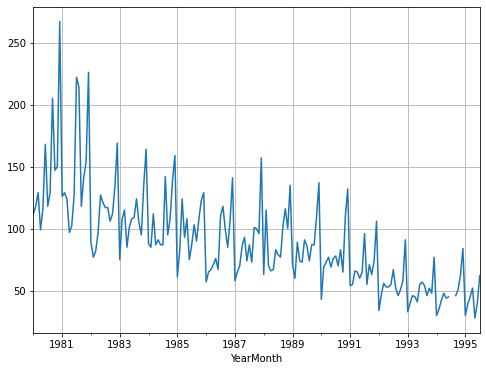

In [3]:
plt.figure(figsize=(8,6))
df.plot()
plt.grid();

In [4]:
df_1 = pd.read_csv('Rose.csv')
df_1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
dates = pd.date_range(start='01-01-1980',periods=len(df_1),freq='M')
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df_1['TimeStamp']=dates

In [7]:
df_1.head()

,YearMonth,Rose,TimeStamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [8]:
df_1.set_index('TimeStamp',inplace=True)
df_1.drop('YearMonth',axis=1,inplace=True)

In [9]:
df_1.head()

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


<Figure size 576x432 with 0 Axes>

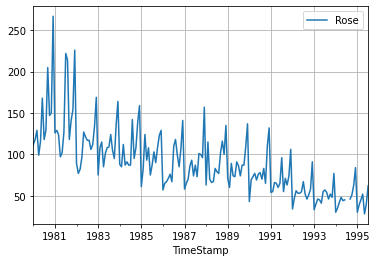

In [10]:
plt.figure(figsize=(8,6))
df_1.plot()
plt.grid();

In [11]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomp = seasonal_decompose(df_1,model='additive')
#decomp.plot()

In [12]:
df_1.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


Remember, the above measure is independent of the Time Series aspect. As in, it does not take into account the Time Stamped data.

In [13]:
df_1.isna().sum()

Rose    2
dtype: int64

In [14]:
df_1[df_1['Rose'].isna()]

,Rose
TimeStamp,
1994-07-31,NaN
1994-08-31,NaN


In [15]:
df_1['1994']

,Rose
TimeStamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [16]:
#df_1['1994'].ffill(axis ='rows',inplace=True) 
#df_1.interpolate(method='spline',order=5)['1994'].tail

In [17]:
#df_1['1994'].ffill(axis ='rows',inplace=True) 
df_1.interpolate()['1994']

,Rose
TimeStamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.333333
1994-08-31,45.666667
1994-09-30,46.000000


In [18]:
df_1['1994']

,Rose
TimeStamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [19]:
df_1.isna().sum()

Rose    2
dtype: int64

In [20]:
df_1.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='TimeStamp', length=187)

<AxesSubplot:xlabel='TimeStamp', ylabel='Rose'>

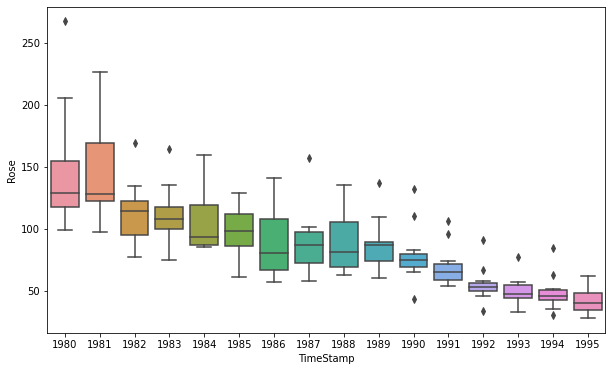

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(df_1.index.year,df_1.Rose)

<AxesSubplot:xlabel='TimeStamp', ylabel='Rose'>

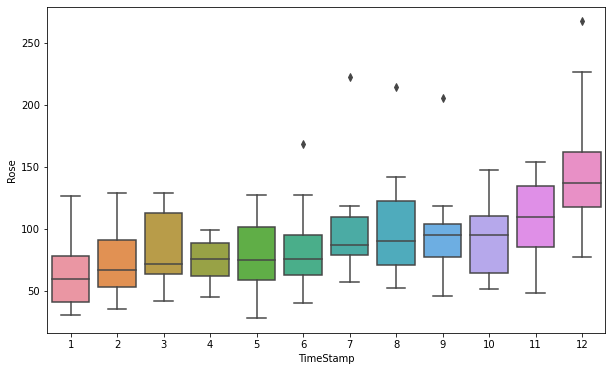

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(df_1.index.month,df_1.Rose)

In [23]:
print(df_1.mean())
print(df_1.median())

Rose    90.394595
dtype: float64
Rose    86.0
dtype: float64


In [24]:
df_1['1980']

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
1980-06-30,168.0
1980-07-31,118.0
1980-08-31,129.0
1980-09-30,205.0


<AxesSubplot:xlabel='TimeStamp'>

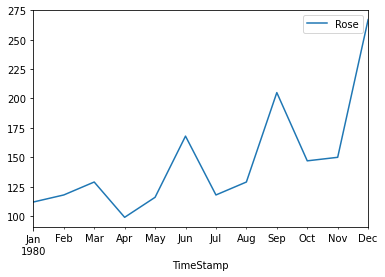

In [25]:
df_1['1980'].plot()

<AxesSubplot:xlabel='TimeStamp', ylabel='Rose'>

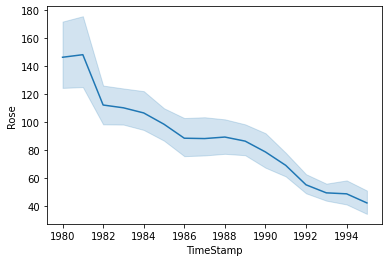

In [26]:
sns.lineplot(df_1.index.year,df_1.Rose)

<AxesSubplot:xlabel='TimeStamp', ylabel='Rose'>

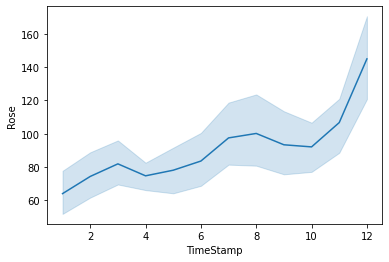

In [27]:
sns.lineplot(df_1.index.month,df_1.Rose)

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


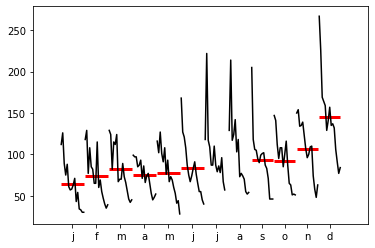

<Figure size 1440x720 with 0 Axes>

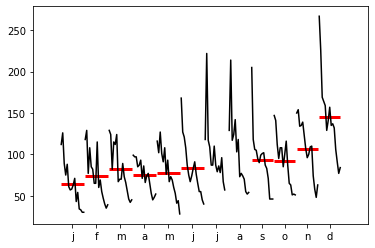

In [28]:
from statsmodels.graphics.tsaplots import month_plot
plt.figure(figsize=(20,10))
month_plot(df)

In [29]:
yearly_month = pd.pivot_table(df_1,values='Rose',columns=df_1.index.month,index=df_1.index.year)
yearly_month

TimeStamp,1,2,3,4,5,6,7,8,9,10,11,12
TimeStamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


<AxesSubplot:xlabel='TimeStamp'>

<Figure size 720x576 with 0 Axes>

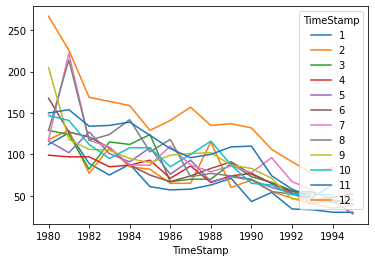

In [30]:
plt.figure(figsize=(10,8))
yearly_month.plot()

In [31]:
monthly_year = pd.pivot_table(df_1,values='Rose',index=df_1.index.month,columns=df_1.index.year)
monthly_year

TimeStamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
TimeStamp,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


<AxesSubplot:xlabel='TimeStamp'>

<Figure size 720x576 with 0 Axes>

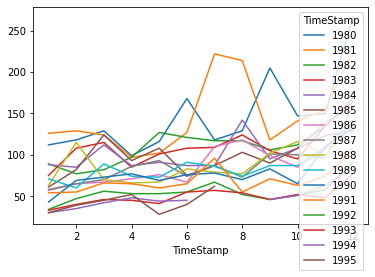

In [32]:
plt.figure(figsize=(10,8))
monthly_year.plot()

In [33]:
df_yearly = df_1.resample('A').sum()
df_yearly

,Rose
TimeStamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0
1985-12-31,1183.0
1986-12-31,1063.0
1987-12-31,1060.0
1988-12-31,1073.0


<AxesSubplot:xlabel='TimeStamp'>

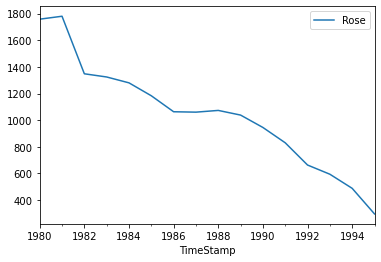

In [34]:
df_yearly.plot()

In [35]:
df_yearly_mean = df_1.resample('A').mean()
df_yearly_mean

,Rose
TimeStamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667
1985-12-31,98.583333
1986-12-31,88.583333
1987-12-31,88.333333
1988-12-31,89.416667


<AxesSubplot:xlabel='TimeStamp'>

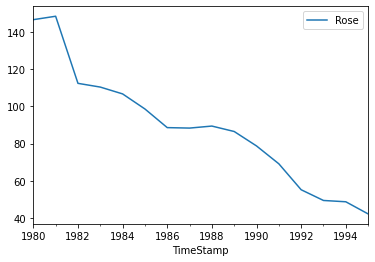

In [36]:
df_yearly_mean.plot()

In [37]:
df_quart = df_1.resample('Q').sum()
df_quart

,Rose
TimeStamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0
...,...
1994-09-30,46.0
1994-12-31,198.0
1995-03-31,114.0


<AxesSubplot:xlabel='TimeStamp'>

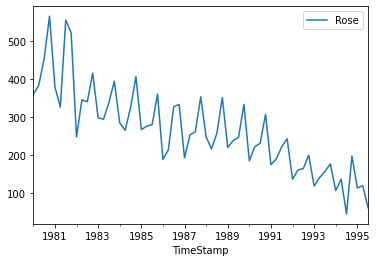

In [38]:
df_quart.plot()

In [39]:
df_quart_mean = df_1.resample('Q').mean()
df_quart_mean

,Rose
TimeStamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333
...,...
1994-09-30,46.000000
1994-12-31,66.000000
1995-03-31,38.000000


<AxesSubplot:xlabel='TimeStamp'>

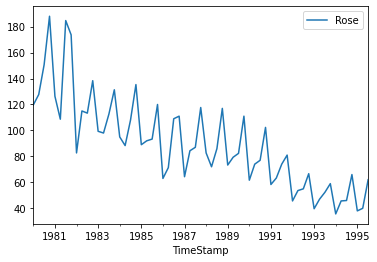

In [40]:
df_quart_mean.plot()

In [41]:
df_daily = df_1.resample('D').sum()
df_daily

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


<AxesSubplot:xlabel='TimeStamp'>

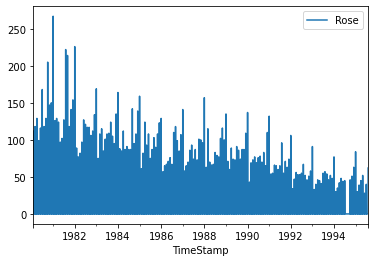

In [42]:
df_daily.plot()

In [43]:
df_daily_mean = df_1.resample('D').mean()
df_daily_mean.ffill(axis ='rows',inplace=True)
df_daily_mean

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-01,112.0
1980-02-02,112.0
1980-02-03,112.0
1980-02-04,112.0
...,...
1995-07-27,40.0
1995-07-28,40.0
1995-07-29,40.0


<AxesSubplot:xlabel='TimeStamp'>

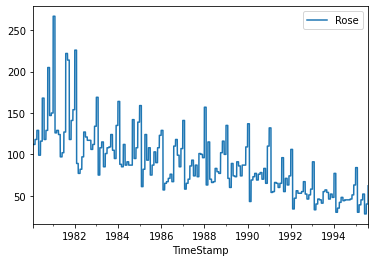

In [44]:
df_daily_mean.plot()

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
df_1.isna().sum()

Rose    2
dtype: int64

In [47]:
df_1['1994'] = df_1.interpolate()['1994']

In [48]:
#df_1.isna().sum()
print("checking Null values after imputing",df_1.isna().sum())

checking Null values after imputing Rose    0
dtype: int64


In [49]:
df_1.shape

(187, 1)

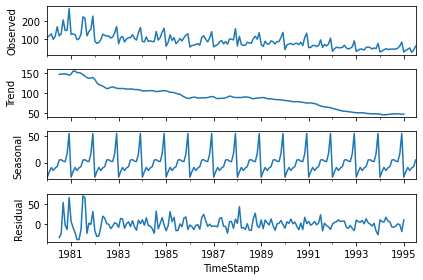

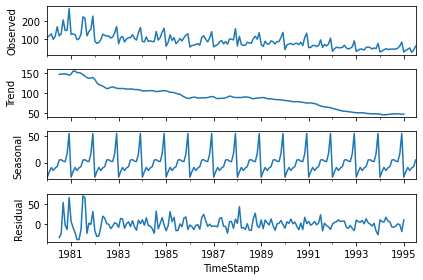

In [50]:
decomp = seasonal_decompose(df_1,model='additive')
decomp.plot()

In [51]:
trend = decomp.trend
trend.head(10)

,Rose
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,147.083333
1980-08-31,148.125000
1980-09-30,148.375000


In [52]:
seasonal = decomp.seasonal
seasonal.head(10)

,Rose
TimeStamp,
1980-01-31,-27.908647
1980-02-29,-17.435632
1980-03-31,-9.285830
1980-04-30,-15.098330
1980-05-31,-10.196544
1980-06-30,-7.678687
1980-07-31,4.896908
1980-08-31,5.499686
1980-09-30,2.774686


In [53]:
resid = decomp.resid
resid.head(10)

,Rose
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,-33.980241
1980-08-31,-24.624686
1980-09-30,53.850314


In [54]:
deseasonal_df = trend+resid

<AxesSubplot:xlabel='TimeStamp'>

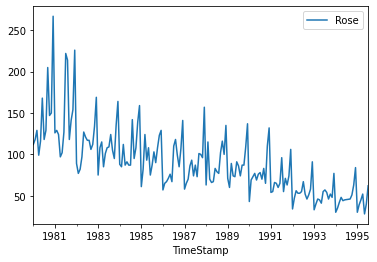

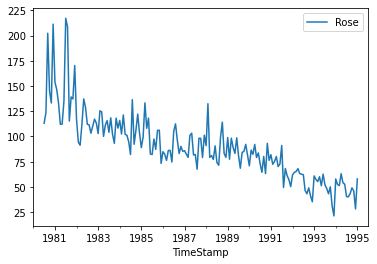

In [55]:
df_1.plot()
deseasonal_df.plot()

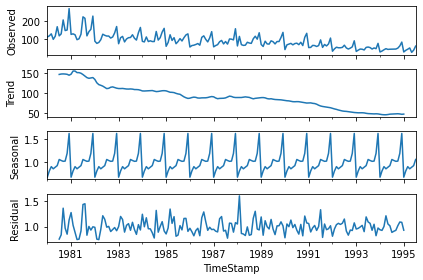

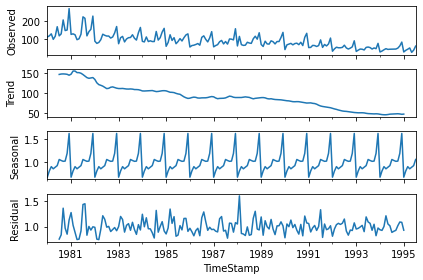

In [56]:
decomp_m = seasonal_decompose(df_1,model='multiplicative')
decomp_m.plot()

In [57]:
trend_m = decomp_m.trend
trend_m.head(10)

,Rose
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,147.083333
1980-08-31,148.125000
1980-09-30,148.375000


In [58]:
seasonal_m = decomp_m.seasonal
seasonal_m.head(10)

,Rose
TimeStamp,
1980-01-31,0.670111
1980-02-29,0.806163
1980-03-31,0.901164
1980-04-30,0.854024
1980-05-31,0.889415
1980-06-30,0.923985
1980-07-31,1.058038
1980-08-31,1.035881
1980-09-30,1.017648


In [59]:
resid_m = decomp_m.resid
resid_m.head(10)

,Rose
TimeStamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,0.758258
1980-08-31,0.840720
1980-09-30,1.357674


In [60]:
deseasonal_df_m = trend_m+resid_m

<AxesSubplot:xlabel='TimeStamp'>

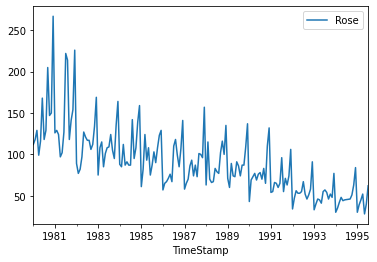

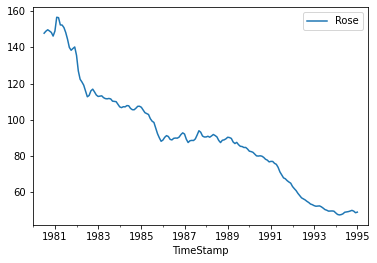

In [61]:
df_1.plot()
deseasonal_df_m.plot()

<AxesSubplot:xlabel='TimeStamp'>

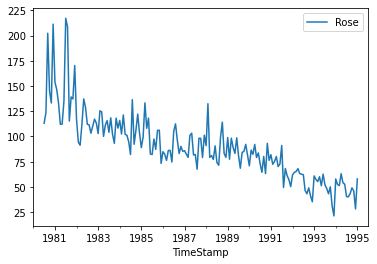

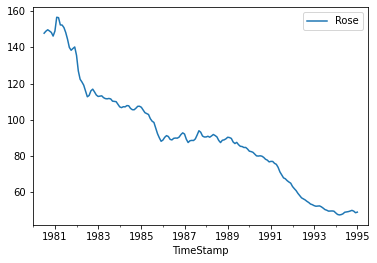

In [62]:
deseasonal_df.plot()
deseasonal_df_m.plot()

In [63]:
# i think its multiplicative as in the Additive model, even if we have removed the Seasonality (deseasonal) 
#there is some kind of seasonality is seen, which is absent in Multiplicative model.

## Split the data into train and test and plot the training and test data. 

In [64]:
train = df_1[df_1.index<'1991']
test = df_1[df_1.index>='1991']

In [65]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [66]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
...,...
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0


Test Data


,Rose
TimeStamp,
1991-01-31,54.000000
1991-02-28,55.000000
1991-03-31,66.000000
1991-04-30,65.000000
1991-05-31,60.000000
1991-06-30,65.000000
1991-07-31,96.000000
1991-08-31,55.000000
1991-09-30,71.000000


In [67]:
from IPython.display import display

In [68]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
TimeStamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
TimeStamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
TimeStamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


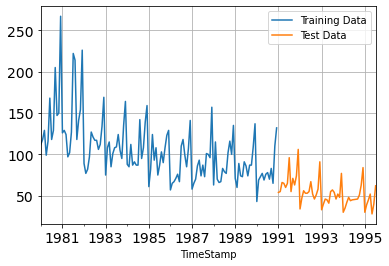

In [69]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Simple Exponential Smoothing

In [70]:
# create class
model_SES = SimpleExpSmoothing(train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [71]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [72]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.09874995867958046,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38699135899094,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.105001
1991-02-28    87.105001
1991-03-31    87.105001
1991-04-30    87.105001
1991-05-31    87.105001
1991-06-30    87.105001
1991-07-31    87.105001
1991-08-31    87.105001
1991-09-30    87.105001
1991-10-31    87.105001
1991-11-30    87.105001
1991-12-31    87.105001
1992-01-31    87.105001
1992-02-29    87.105001
1992-03-31    87.105001
1992-04-30    87.105001
1992-05-31    87.105001
1992-06-30    87.105001
1992-07-31    87.105001
1992-08-31    87.105001
1992-09-30    87.105001
1992-10-31    87.105001
1992-11-30    87.105001
1992-12-31    87.105001
1993-01-31    87.105001
1993-02-28    87.105001
1993-03-31    87.105001
1993-04-30    87.105001
1993-05-31    87.105001
1993-06-30    87.105001
1993-07-31    87.105001
1993-08-31    87.105001
1993-09-30    87.105001
1993-10-31    87.105001
1993-11-30    87.105001
1993-12-31    87.105001
1994-01-31    87.105001
1994-02-28    87.105001
1994-03-31    87.105001
1994-04-30    87.105001
1994-05-31    87.105001
1994-06-30    87

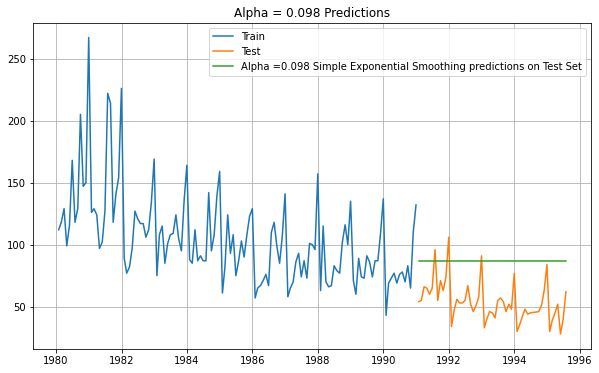

In [74]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [75]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.79624359473444
SES RMSE (calculated using statsmodels): 36.796243594734435


In [76]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.098,SES'])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244


## Double Exponential Smoothing

In [77]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [78]:
# Fitting the model
model_DES = model_DES.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [79]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
model_DES.params


==Holt model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31     86.863579
1991-02-28     88.028056
1991-03-31     89.192534
1991-04-30     90.357011
1991-05-31     91.521488
1991-06-30     92.685966
1991-07-31     93.850443
1991-08-31     95.014921
1991-09-30     96.179398
1991-10-31     97.343876
1991-11-30     98.508353
1991-12-31     99.672831
1992-01-31    100.837308
1992-02-29    102.001785
1992-03-31    103.166263
1992-04-30    104.330740
1992-05-31    105.495218
1992-06-30    106.659695
1992-07-31    107.824173
1992-08-31    108.988650
1992-09-30    110.153127
1992-10-31    111.317605
1992-11-30    112.482082
1992-12-31    113.646560
1993-01-31    114.811037
1993-02-28    115.975515
1993-03-31    117.139992
1993-04-30    118.304469
1993-05-31    119.468947
1993-06-30    120.633424
1993-07-31    121.797902
1993-08-31    122.962379
1993-09-30    124.126857
1993-10-31    125.291334
1993-11-30    126.455811
1993-12-31    127.620289
1994-01-31    128.784766
1994-02-28    129.949244
1994-03-31    131.113721
1994-04-30    132.278199


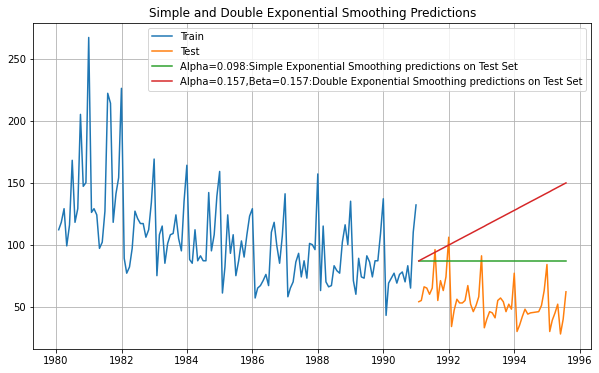

In [81]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [82]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 70.57245196981661


In [83]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.157,Beta=0.157:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452


In [84]:
# Initializing the Double Exponential Smoothing Model
model_DES1 = Holt(train,exponential=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [85]:
# Fitting the model
model_DES1 = model_DES1.fit()

In [86]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
model_DES1.params


==Holt model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.01920533831449077,
 'smoothing_slope': 0.012083532090751897,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 150.14127529701187,
 'initial_slope': 0.9936717876881109,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
# Forecasting using this model for the duration of the test set
DES_predict1 =  model_DES1.forecast(len(test))
DES_predict1

1991-01-31    72.461546
1991-02-28    72.088847
1991-03-31    71.718065
1991-04-30    71.349190
1991-05-31    70.982213
1991-06-30    70.617123
1991-07-31    70.253911
1991-08-31    69.892566
1991-09-30    69.533081
1991-10-31    69.175444
1991-11-30    68.819647
1991-12-31    68.465680
1992-01-31    68.113533
1992-02-29    67.763198
1992-03-31    67.414665
1992-04-30    67.067924
1992-05-31    66.722967
1992-06-30    66.379784
1992-07-31    66.038366
1992-08-31    65.698704
1992-09-30    65.360789
1992-10-31    65.024612
1992-11-30    64.690164
1992-12-31    64.357437
1993-01-31    64.026421
1993-02-28    63.697107
1993-03-31    63.369487
1993-04-30    63.043552
1993-05-31    62.719294
1993-06-30    62.396704
1993-07-31    62.075772
1993-08-31    61.756492
1993-09-30    61.438853
1993-10-31    61.122848
1993-11-30    60.808469
1993-12-31    60.495707
1994-01-31    60.184553
1994-02-28    59.874999
1994-03-31    59.567038
1994-04-30    59.260661
1994-05-31    58.955860
1994-06-30    58

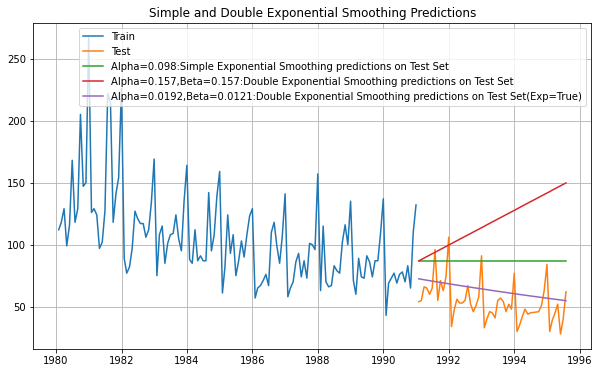

In [88]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.0192,Beta=0.0121:Double Exponential Smoothing predictions on Test Set(Exp=True)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [89]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict1.values,squared=False))

DES RMSE: 17.223483135193124


In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.0192,Beta=0.0121:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483


## Triple Exponential Smoothing or Holt Winter's Method

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [92]:
# Fitting the model
model_TES = model_TES.fit()

In [93]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.13346905584155852,
 'smoothing_slope': 0.013798044930131528,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 77.90998273991845,
 'initial_slope': 0.0,
 'initial_seasons': array([ 37.19347871,  49.53447903,  57.45342246,  46.82461047,
         55.5675085 ,  60.9978818 ,  70.94829431,  76.95581437,
         72.98548228,  71.11492918,  89.18261025, 131.38117683]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     44.127161
1991-02-28     56.072510
1991-03-31     63.595803
1991-04-30     52.571339
1991-05-31     60.918586
1991-06-30     65.953308
1991-07-31     75.508069
1991-08-31     81.119938
1991-09-30     76.753955
1991-10-31     74.487750
1991-11-30     92.159780
1991-12-31    133.962695
1992-01-31     39.379346
1992-02-29     51.324695
1992-03-31     58.847987
1992-04-30     47.823524
1992-05-31     56.170770
1992-06-30     61.205492
1992-07-31     70.760253
1992-08-31     76.372122
1992-09-30     72.006139
1992-10-31     69.739934
1992-11-30     87.411964
1992-12-31    129.214879
1993-01-31     34.631530
1993-02-28     46.576879
1993-03-31     54.100171
1993-04-30     43.075708
1993-05-31     51.422955
1993-06-30     56.457677
1993-07-31     66.012438
1993-08-31     71.624307
1993-09-30     67.258323
1993-10-31     64.992119
1993-11-30     82.664149
1993-12-31    124.467064
1994-01-31     29.883714
1994-02-28     41.829063
1994-03-31     49.352355
1994-04-30     38.327892


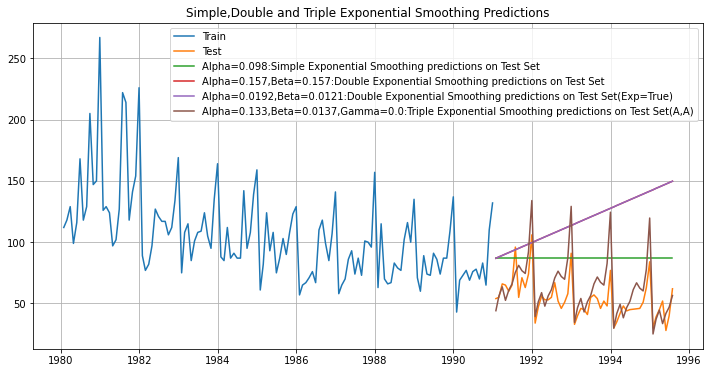

In [95]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.0192,Beta=0.0121:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.0137,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(A,A)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [96]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 16.443203233657176


In [97]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.133,Beta=0.0137,Gamma=0.0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203


In [98]:
# Initializing the Double Exponential Smoothing Model
model_TES1 = ExponentialSmoothing(train,trend='mul',seasonal='additive')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [99]:
# Fitting the model
model_TES1 = model_TES1.fit()

In [100]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES1.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 2.9044572268848643e-10,
 'smoothing_slope': 1.8799060886954682e-13,
 'smoothing_seasonal': 0.21410032095527884,
 'damping_slope': nan,
 'initial_level': 92.76189360232776,
 'initial_slope': 0.9817396755317827,
 'initial_seasons': array([ 41.77470181,  46.52453706,  52.34729782,  30.59523424,
         43.88038643,  70.9624501 ,  83.57371289,  87.14233988,
         81.44104686,  70.31190074,  83.58551956, 161.71541608]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
# Forecasting using this model for the duration of the test set
TES_predict1 =  model_TES1.forecast(len(test))
TES_predict1

1991-01-31     49.132795
1991-02-28     64.004489
1991-03-31     69.703466
1991-04-30     62.983125
1991-05-31     66.722033
1991-06-30     72.178080
1991-07-31     79.261080
1991-08-31     79.345027
1991-09-30     83.601386
1991-10-31     80.824084
1991-11-30     99.743394
1991-12-31    137.885716
1992-01-31     47.546327
1992-02-29     62.446990
1992-03-31     68.174408
1992-04-30     61.481988
1992-05-31     65.248307
1992-06-30     70.731265
1992-07-31     77.840684
1992-08-31     77.950568
1992-09-30     82.232390
1992-10-31     79.480086
1992-11-30     98.423938
1992-12-31    136.590354
1993-01-31     46.274619
1993-02-28     61.198504
1993-03-31     66.948719
1993-04-30     60.278681
1993-05-31     64.066973
1993-06-30     69.571502
1993-07-31     76.702099
1993-08-31     76.832774
1993-09-30     81.135008
1993-10-31     78.402742
1993-11-30     97.366267
1993-12-31    135.551996
1994-01-31     45.255221
1994-02-28     60.197721
1994-03-31     65.966211
1994-04-30     59.314114


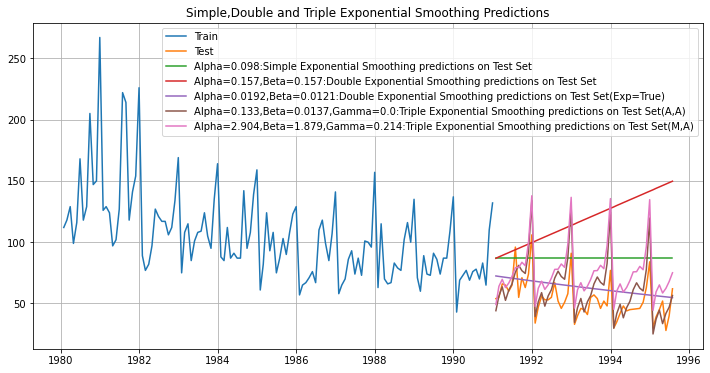

In [102]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.0192,Beta=0.0121:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.0137,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(A,A)')
plt.plot(TES_predict1, label='Alpha=2.904,Beta=1.879,Gamma=0.214:Triple Exponential Smoothing predictions on Test Set(M,A)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [103]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict1.values,squared=False))

TES RMSE: 25.14680702105763


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict1.values,squared=False)]}
                           ,index=['Alpha=2.904,Beta=1.879,Gamma=0.214:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807


In [105]:
# Initializing the Double Exponential Smoothing Model
model_TES2 = ExponentialSmoothing(train,trend='mul',seasonal='mul')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [106]:
# Fitting the model
model_TES2 = model_TES2.fit()

In [107]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES2.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.0700104887428228,
 'smoothing_slope': 9.88074207901599e-19,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65441503982137,
 'initial_slope': 0.993905330571457,
 'initial_seasons': array([1.45242339, 1.64428963, 1.79921093, 1.57525049, 1.76978283,
        1.90993608, 2.10105283, 2.24524946, 2.11409058, 2.07326895,
        2.41579163, 3.31143032]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
# Forecasting using this model for the duration of the test set
TES_predict2 =  model_TES2.forecast(len(test))
TES_predict2

1991-01-31     54.017006
1991-02-28     60.779988
1991-03-31     66.101208
1991-04-30     57.520408
1991-05-31     64.229913
1991-06-30     68.893969
1991-07-31     75.325906
1991-08-31     80.004979
1991-09-30     74.872274
1991-10-31     72.979032
1991-11-30     84.517559
1991-12-31    115.145803
1992-01-31     50.196189
1992-02-29     56.480801
1992-03-31     61.425632
1992-04-30     53.451783
1992-05-31     59.686700
1992-06-30     64.020851
1992-07-31     69.997834
1992-08-31     74.345939
1992-09-30     69.576289
1992-10-31     67.816963
1992-11-30     78.539328
1992-12-31    107.001127
1993-01-31     46.645632
1993-02-28     52.485711
1993-03-31     57.080776
1993-04-30     49.670946
1993-05-31     55.464846
1993-06-30     59.492427
1993-07-31     65.046636
1993-08-31     69.087184
1993-09-30     64.654908
1993-10-31     63.020025
1993-11-30     72.983960
1993-12-31     99.432553
1994-01-31     43.346219
1994-02-28     48.773208
1994-03-31     53.043248
1994-04-30     46.157542


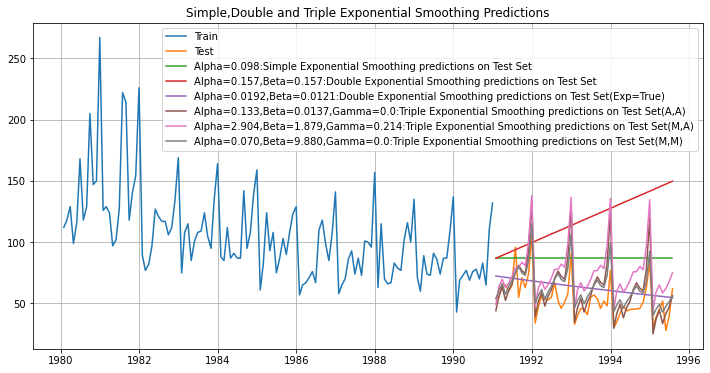

In [109]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.0192,Beta=0.0121:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.0137,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(A,A)')
plt.plot(TES_predict1, label='Alpha=2.904,Beta=1.879,Gamma=0.214:Triple Exponential Smoothing predictions on Test Set(M,A)')
plt.plot(TES_predict2, label='Alpha=0.070,Beta=9.880,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(M,M)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [110]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict2.values,squared=False))

TES RMSE: 12.795795972028388


In [111]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict2.values,squared=False)]}
                           ,index=['Alpha=0.070,Beta=9.880,Gamma=0.0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796


In [112]:
# Initializing the Double Exponential Smoothing Model
model_TES3 = ExponentialSmoothing(train,trend='add',seasonal='mul')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [113]:
# Fitting the model
model_TES3 = model_TES3.fit(smoothing_level=0.3,
    smoothing_slope=0.4,
    smoothing_seasonal=0.3,optimized=True)

In [114]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES3.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.3,
 'smoothing_slope': 0.4,
 'smoothing_seasonal': 0.3,
 'damping_slope': nan,
 'initial_level': 76.63636363636364,
 'initial_slope': 0.15277777777777787,
 'initial_seasons': array([1.46144721, 1.53973903, 1.68327402, 1.29181495, 1.51364176,
        2.19217082, 1.53973903, 1.68327402, 2.67497034, 1.91814947,
        1.95729537, 3.48398577]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
# Forecasting using this model for the duration of the test set
TES_predict3 =  model_TES3.forecast(len(test))
TES_predict3

1991-01-31     47.084913
1991-02-28     61.313268
1991-03-31     64.435040
1991-04-30     61.141676
1991-05-31     59.139898
1991-06-30     63.694859
1991-07-31     66.454577
1991-08-31     64.356692
1991-09-30     76.784402
1991-10-31     74.086160
1991-11-30     94.574828
1991-12-31    109.274486
1992-01-31     43.299584
1992-02-29     56.350823
1992-03-31     59.184519
1992-04-30     56.125454
1992-05-31     54.254506
1992-06-30     58.396722
1992-07-31     60.888303
1992-08-31     58.928247
1992-09-30     70.261840
1992-10-31     67.747937
1992-11-30     86.425659
1992-12-31     99.790602
1993-01-31     39.514255
1993-02-28     51.388379
1993-03-31     53.933998
1993-04-30     51.109232
1993-05-31     49.369114
1993-06-30     53.098585
1993-07-31     55.322029
1993-08-31     53.499803
1993-09-30     63.739279
1993-10-31     61.409714
1993-11-30     78.276490
1993-12-31     90.306718
1994-01-31     35.728926
1994-02-28     46.425935
1994-03-31     48.683477
1994-04-30     46.093011


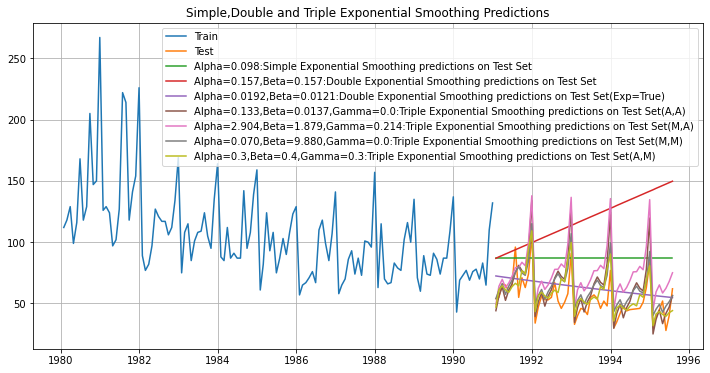

In [116]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.157,Beta=0.157:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.0192,Beta=0.0121:Double Exponential Smoothing predictions on Test Set(Exp=True)')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.0137,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(A,A)')
plt.plot(TES_predict1, label='Alpha=2.904,Beta=1.879,Gamma=0.214:Triple Exponential Smoothing predictions on Test Set(M,A)')
plt.plot(TES_predict2, label='Alpha=0.070,Beta=9.880,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set(M,M)')
plt.plot(TES_predict3, label='Alpha=0.3,Beta=0.4,Gamma=0.3:Triple Exponential Smoothing predictions on Test Set(A,M)')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [117]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict3.values,squared=False))

TES RMSE: 10.945435096595471


In [118]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict3.values,squared=False)]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435


# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training and testing data before fitting it into a linear regression.

In [119]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print("Regression time for train: \n",train_time)
print("Regression time for test: \n",test_time)

Regression time for train: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Regression time for test: 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [120]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [121]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
TimeStamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
TimeStamp,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
TimeStamp,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data


,Rose,time
TimeStamp,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lr = LinearRegression()

In [124]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train[['Rose']])

LinearRegression()

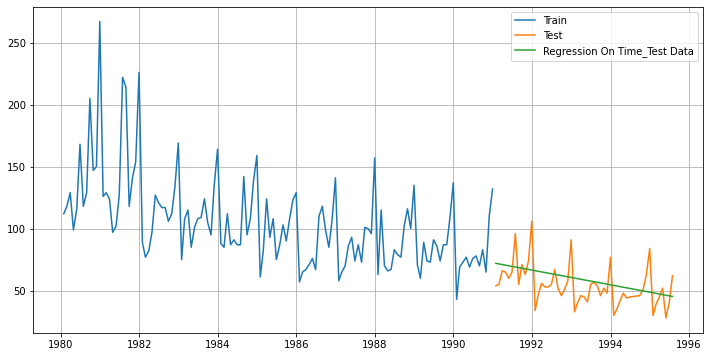

In [125]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [126]:
from sklearn import metrics

In [127]:
rmse_model1_test=metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print('Regression on test data: ',rmse_model1_test)

Regression on test data:  15.268955197146555


In [128]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [129]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [130]:
NaiveModel_train.tail()

,Rose
TimeStamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [131]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

TimeStamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

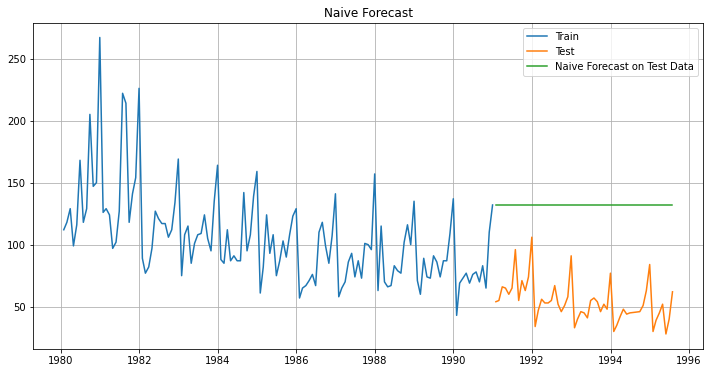

In [132]:
plt.figure(figsize=(12,6))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [133]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.719


In [134]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [135]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [136]:
SimpleAverage_test['mean_forecast']=train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
TimeStamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


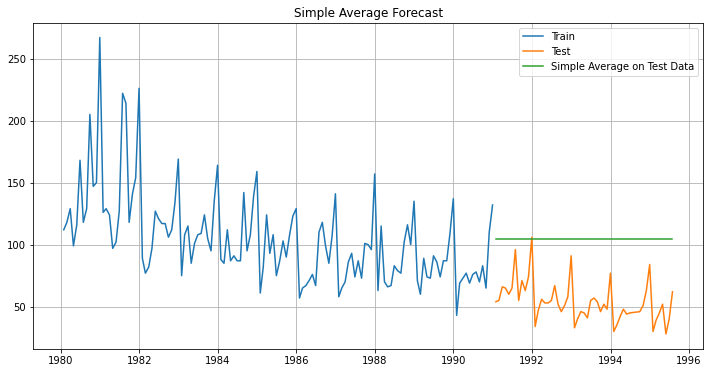

In [137]:
plt.figure(figsize=(12,6))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [138]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [139]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [140]:
MovingAverage = df_1.copy()
MovingAverage.head()

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [141]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
TimeStamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


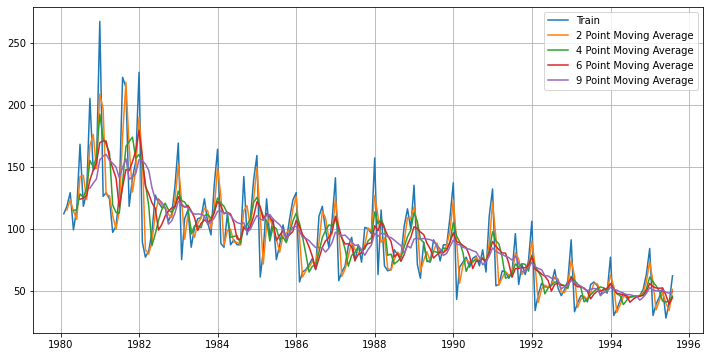

In [142]:
## Plotting on the whole data
plt.figure(figsize=(12,6))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [143]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

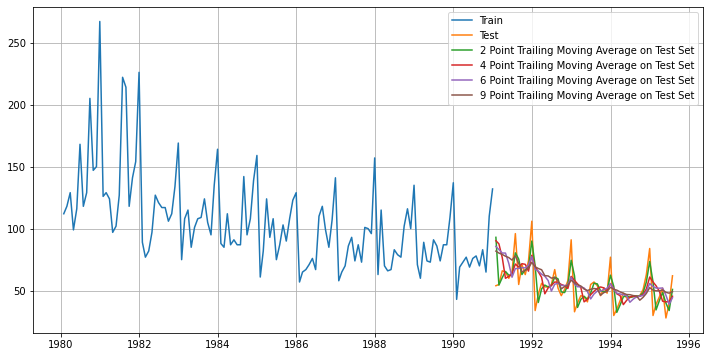

In [144]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,6))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [145]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [146]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


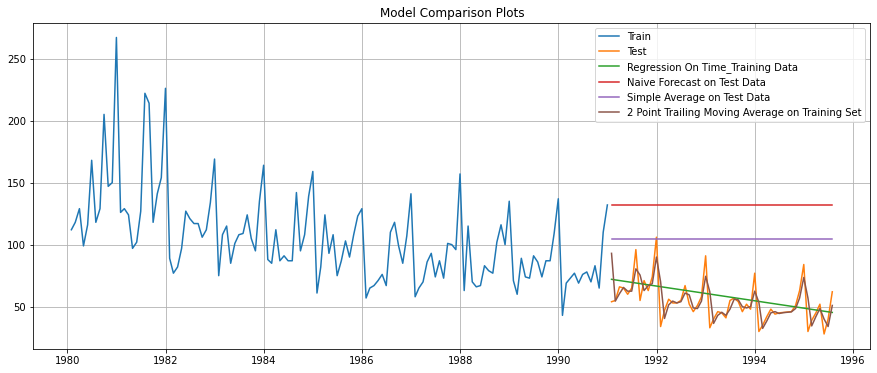

In [147]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [148]:
#try taking log, np.log(train) and np.log(test) then apply SES or any other models.

Augmented Dickey-Fuller Test - Let's run the Augmented Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is **non-stationary**.

In [149]:
from statsmodels.tsa.stattools import adfuller

### write hypothesis for ADFuller test

In [150]:
print('STEP 1: H0 : Time Series is non-stationary \n        H1 : Time Series is stationary  \n')
print('STEP 2: Consider the level of significanace (α) as 0.05 \n')
print('STEP 3: Using the Augmented Dickey Fuller (ADF) test we test for stationarity. \n')

STEP 1: H0 : Time Series is non-stationary 
        H1 : Time Series is stationary  

STEP 2: Consider the level of significanace (α) as 0.05 

STEP 3: Using the Augmented Dickey Fuller (ADF) test we test for stationarity. 



In [151]:
dftest = adfuller(df_1['Rose'])
print(dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])
print('#Lags Used is ',dftest[2])
print('Number of Observations Used',dftest[3])
print('Critical Value : ',dftest[4])

(-1.8766991079908264, 0.3431007142833743, 13, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}, 1516.2583629826856)
DF test statistic is -1.877
DF test p-value is 0.3431
#Lags Used is  13
Number of Observations Used 173
Critical Value :  {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

As we observed while plotting the moving average over months that there is a monthly pattern. Let us try to decipher the seasonal component.

<AxesSubplot:>

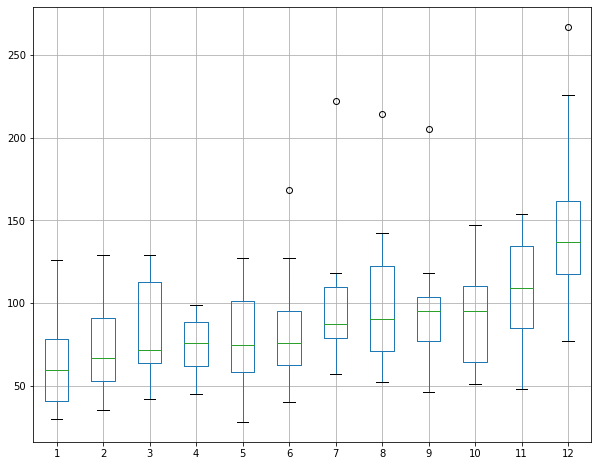

In [152]:
plt.figure(figsize=(10,8))
yearly_month.boxplot()

Here, we can see that the Rose wine sales is fluctuating once in few months but it is high in the December month(12) (comparing to all the months) every year. This might be due to the festival season of the year. We can see a seasonal effect with a cycle of 12 months.

## Check for stationarity of the whole Time Series data.

In [153]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

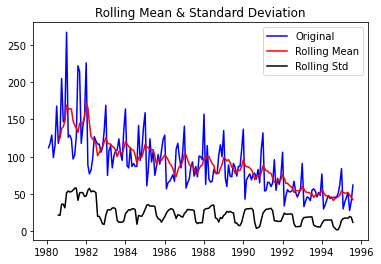

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [154]:
test_stationarity(df_1['Rose'])

In [155]:
sales_ts_1 = df_1['Rose'].diff(1)
sales_ts_1.dropna(inplace=True)

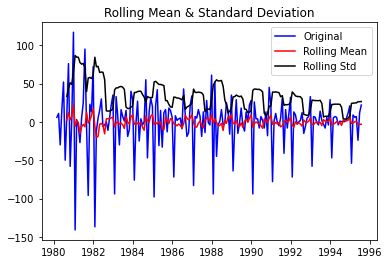

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [156]:
test_stationarity(sales_ts_1)

In [157]:
sales_ts_log = np.log10(df_1['Rose'])
sales_ts_log.dropna(inplace=True)

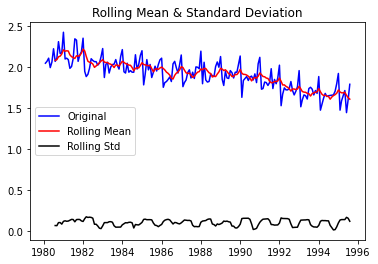

Results of Dickey-Fuller Test:
Test Statistic                  -0.422521
p-value                          0.906270
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [158]:
test_stationarity(sales_ts_log)

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

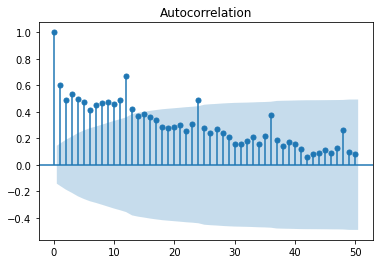

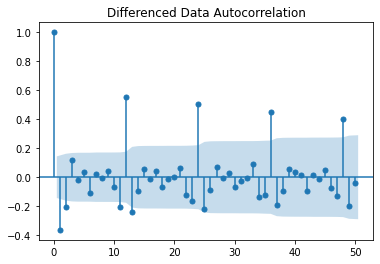

In [160]:
plot_acf(df_1['Rose'],lags=50)
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

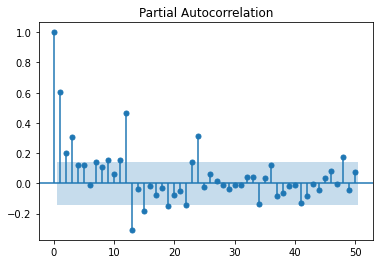

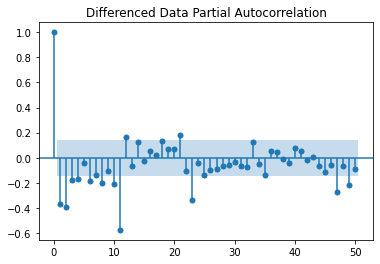

In [161]:
plot_pacf(df_1['Rose'],lags=50)
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [162]:
#train=sales_ts_1[sales_ts_1.index.year < 1991]
#test=sales_ts_1[sales_ts_1.index.year >= 1991]

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [163]:
train = df_1[df_1.index<'1991']
test = df_1[df_1.index>='1991']

In [164]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
TimeStamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
TimeStamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
TimeStamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


## Check for stationarity of the Training Data Time Series.

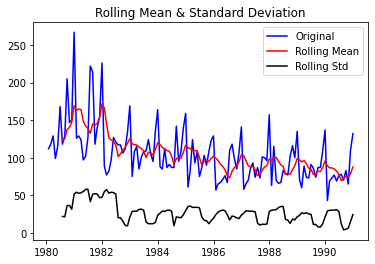

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [165]:
test_stationarity(train['Rose'])

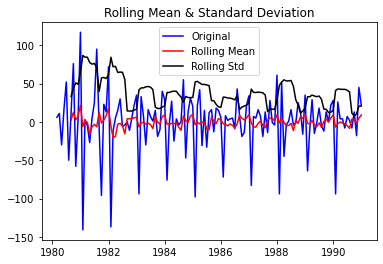

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [166]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [168]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [169]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [170]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353767128365
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757578817404
ARIMA(1, 1, 2) - AIC:1277.3592239194302
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093122
ARIMA(2, 1, 2) - AIC:1279.298693936552


In [171]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835377
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775758
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [172]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 24 Feb 2021   AIC                           1276.835
Time:                        16:52:54   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

## Predict on the Test Set using this model and evaluate the model.

In [173]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [174]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618895918556849


In [175]:
resultsDf_ar = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_ar])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

<Figure size 720x576 with 0 Axes>

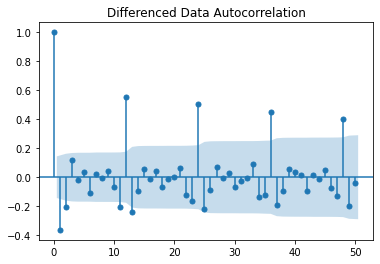

In [176]:
plt.figure(figsize=(10,8))
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 and 12. We will run our auto SARIMA models by setting seasonality as 6 and 12.

### Setting the seasonality as 6 of the auto SARIMA model.

In [177]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq_6 = list(itertools.product(p, d, q))
model_pdq_6 = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq_6[i], model_pdq_6[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [178]:
SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_6

,param,seasonal,AIC


In [179]:
import statsmodels.api as sm

for param in pdq_6:
    for param_seasonal in model_pdq_6:
        SARIMA_model_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_6 = SARIMA_model_6.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_6.aic))
        SARIMA_AIC_6 = SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113852
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827465
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149107
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722499
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426239624
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.536909738396
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029552
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.190821775279
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745042
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746181
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124550076
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982455
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189636624
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082631612
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283242828767
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215658075
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.69614577753
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.077179893097
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2208878767262


In [180]:
SARIMA_AIC_6.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220888
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [181]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Wed, 24 Feb 2021   AIC                           1041.656
Time:                                   16:53:56   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.918      0.000      -0.891      -0.297
ma.L1         -0.1954    162.555     -0.001

<Figure size 720x576 with 0 Axes>

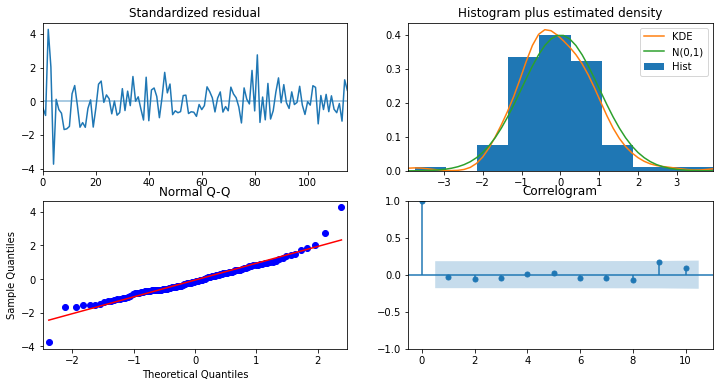

In [182]:
plt.figure(figsize=(10,8))
results_auto_SARIMA_6.plot_diagnostics(figsize=(12,6))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [183]:
predicted_auto_SARIMA_rose_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [184]:
predicted_auto_SARIMA_rose_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.838216,18.847793,25.897219,99.779212
1,67.628404,19.299538,29.802005,105.454803
2,74.744933,19.412081,36.697952,112.791913
3,71.323558,19.475024,33.153211,109.493905
4,76.016065,19.483304,37.829491,114.202639


In [185]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_rose_6.predicted_mean,squared=False)
print(rmse)

26.13237647733872


In [186]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


### Setting the seasonality as 12 of the auto SARIMA model.

In [187]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [188]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [189]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207336
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380903
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938668
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753444
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069756
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945767
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.536909738396
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383678
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491793
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947212
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306766
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535995
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.333243046169
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198829957237
SARIMA(0, 1, 2)x(0, 0, 0, 1

In [190]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686906
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [191]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 24 Feb 2021   AIC                            887.938
Time:                                    16:55:54   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.842     -0.004      0.996    -372.926     371.240
ma.L2         -0.1573     29.825   

<Figure size 720x576 with 0 Axes>

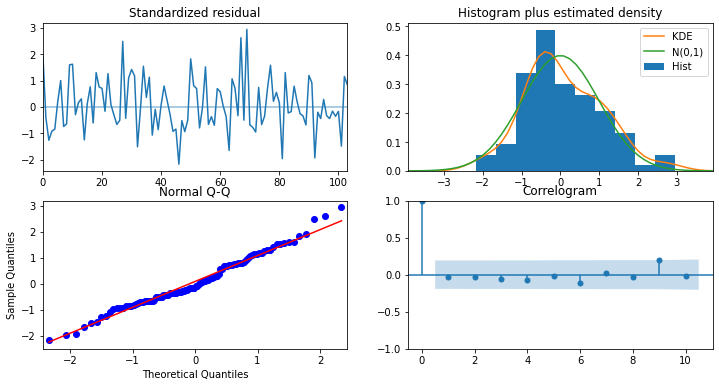

In [192]:
plt.figure(figsize=(10,8))
results_auto_SARIMA_12.plot_diagnostics(figsize=(12,6))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [193]:
predicted_auto_SARIMA_rose = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [194]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928501,31.647975,94.086551
1,70.541190,16.147659,38.892361,102.190020
2,77.356410,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857639
4,72.747398,16.147656,41.098573,104.396223


In [195]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_rose.predicted_mean,squared=False)
print(rmse)

26.92836176873382


In [196]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

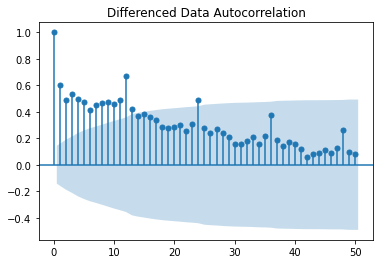

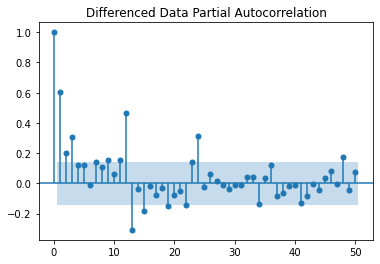

In [197]:
plot_acf(df_1['Rose'].dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

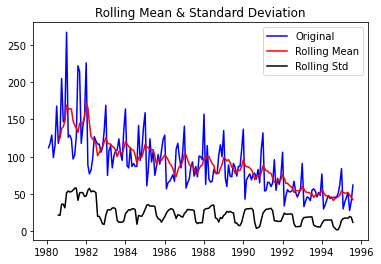

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [198]:
test_stationarity(df_1['Rose'].dropna())

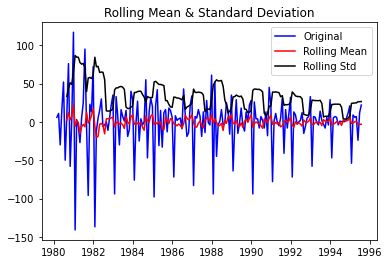

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [199]:
test_stationarity(df_1['Rose'].diff().dropna())

<Figure size 864x432 with 0 Axes>

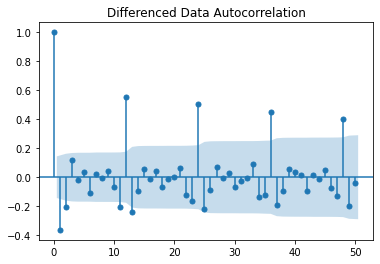

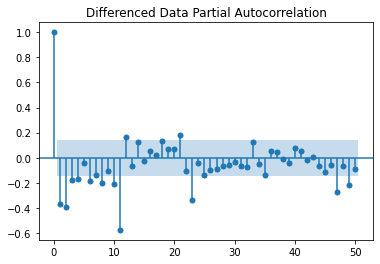

In [200]:
plt.figure(figsize=(12,6))
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF has 4 AR terms and ACF plot has 2 MA terms.

In [201]:
manual_ARIMA_1 = ARIMA(train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA_1 = manual_ARIMA_1.fit()

print(results_manual_ARIMA_1.summary())

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Wed, 24 Feb 2021   AIC                           1283.753
Time:                        16:55:59   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

In [202]:
predicted_manual_ARIMA_1 = results_manual_ARIMA_1.forecast(steps=len(test))

In [203]:
rmse_1 = mean_squared_error(test['Rose'],predicted_manual_ARIMA_1[0],squared=False)
print(rmse_1)

33.950140751110546


In [204]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.950
Date:                Wed, 24 Feb 2021   AIC                           1280.969
Time:                        16:56:00   BIC                           1301.096
Sample:                    02-29-1980   HQIC                          1289.147
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.655      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.286      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

## Predict on the Test Set using this model and evaluate the model.

In [205]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [206]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.52226366227944


In [207]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

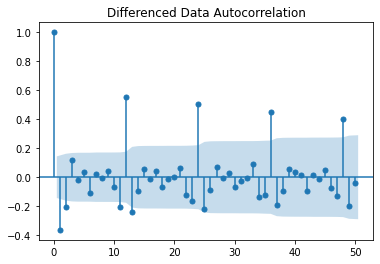

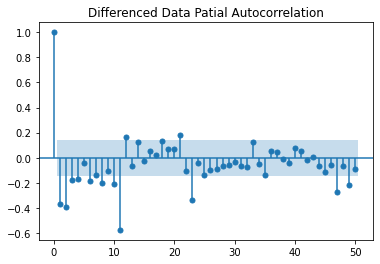

In [208]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

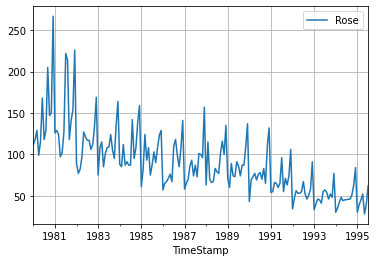

In [209]:
df_1.plot()
plt.grid();

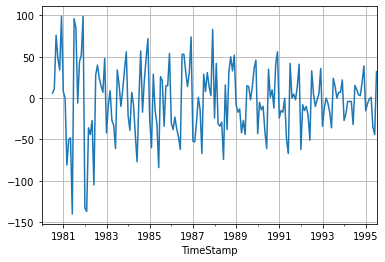

In [210]:
(df_1['Rose'].diff(6)).plot()
plt.grid();

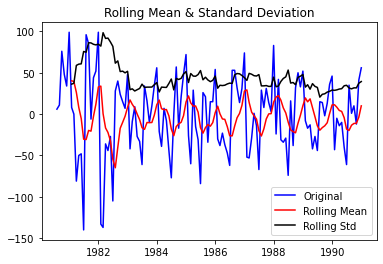

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [211]:
test_stationarity(train['Rose'].diff(6).dropna())

Trend is seen in the above seasonal plot so differenced it to remove trend from seasonal.

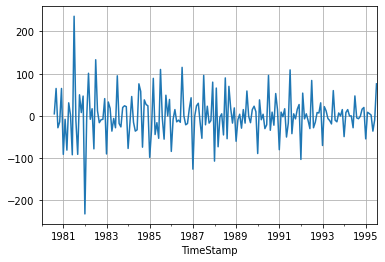

In [212]:
(df_1['Rose'].diff(6).diff()).plot()
plt.grid();

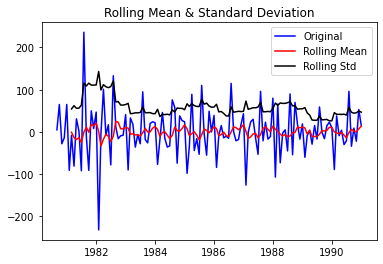

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [213]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

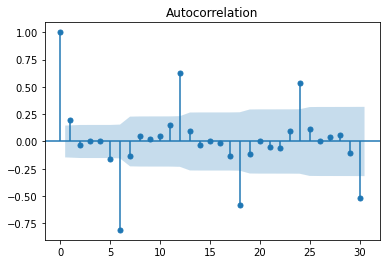

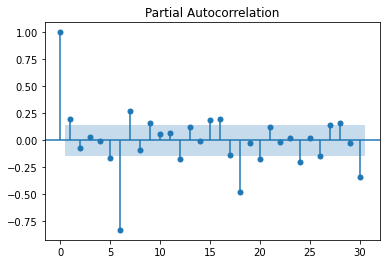

In [214]:
plot_acf((df_1['Rose'].diff(6).dropna()),lags=30)
plot_pacf((df_1['Rose'].diff(6).dropna()),lags=30);

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


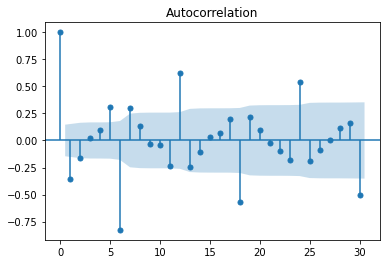

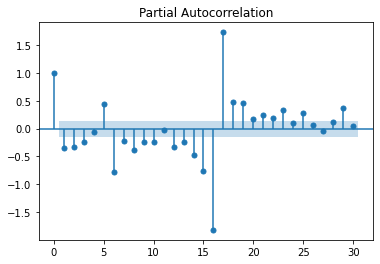

In [215]:
plot_acf((df_1['Rose'].diff(6).diff().dropna()),lags=30)
plot_pacf((df_1['Rose'].diff(6).diff().dropna()),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [216]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -444.189
Date:                           Wed, 24 Feb 2021   AIC                            910.378
Time:                                   16:56:17   BIC                            939.466
Sample:                                        0   HQIC                           922.162
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7725      0.141     -5.495      0.000      -1.048      -0.497
ar.L2          0.0499      0.173      0.288

<Figure size 720x576 with 0 Axes>

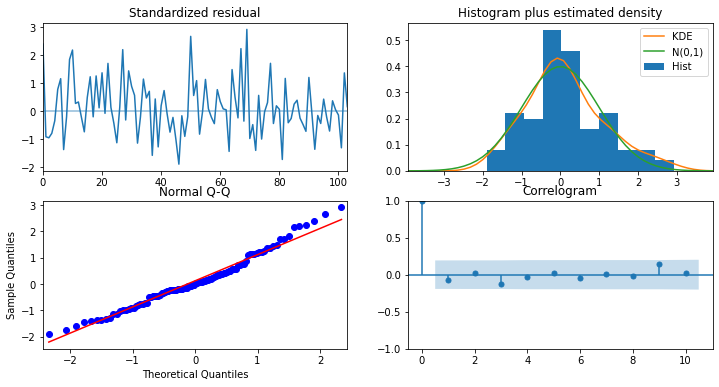

In [217]:
plt.figure(figsize=(10,8))
results_manual_SARIMA_6.plot_diagnostics(figsize=(12,6))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [218]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [219]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,50.125556,17.064985,16.678800,83.572312
1,61.105515,17.996090,25.833826,96.377204
2,72.845673,18.000220,37.565891,108.125456
3,72.596861,18.178084,36.968471,108.225250
4,69.221165,18.244058,33.463468,104.978862


In [220]:
rmse1 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse1)

18.035139647852553


In [221]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

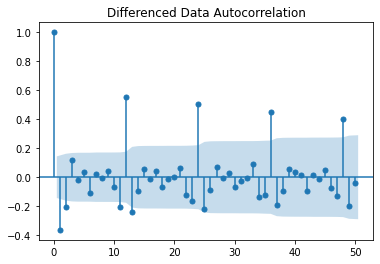

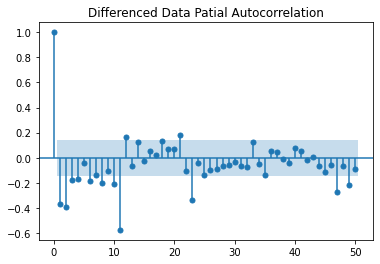

In [222]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

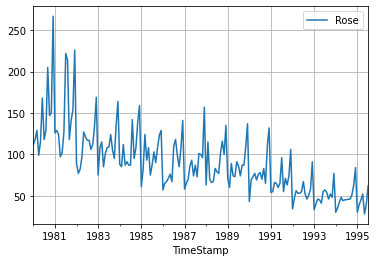

In [223]:
df_1.plot()
plt.grid();

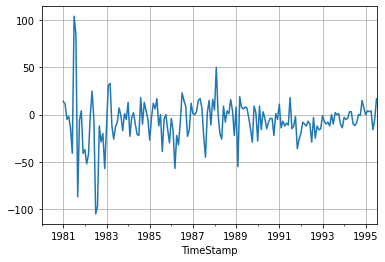

In [224]:
(df_1['Rose'].diff(12)).plot()
plt.grid();

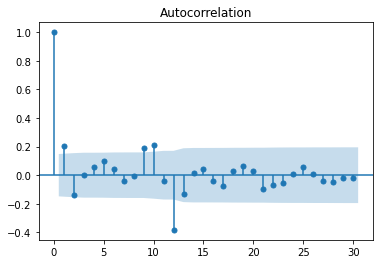

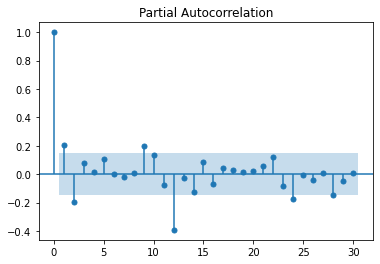

In [225]:
plot_acf((df_1['Rose'].diff(12).dropna()),lags=30)
plot_pacf((df_1['Rose'].diff(12).dropna()),lags=30);

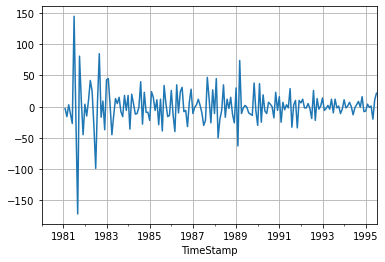

In [226]:
(df_1['Rose'].diff(12).diff()).plot()
plt.grid();

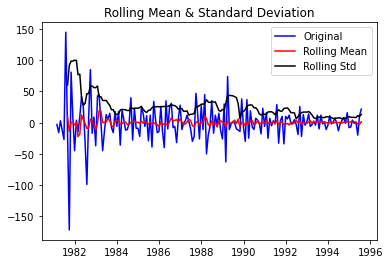

Results of Dickey-Fuller Test:
Test Statistic                  -4.605725
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [227]:
test_stationarity(df_1['Rose'].diff(12).diff().dropna())

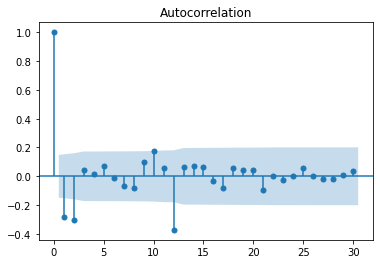

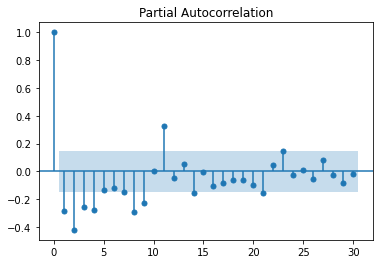

In [228]:
plot_acf((df_1['Rose'].diff(12).diff().dropna()),lags=30)
plot_pacf((df_1['Rose'].diff(12).diff().dropna()),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [229]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -281.243
Date:                            Wed, 24 Feb 2021   AIC                            586.486
Time:                                    16:57:10   BIC                            613.120
Sample:                                         0   HQIC                           597.040
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0405      0.202     -5.163      0.000      -1.435      -0.645
ar.L2         -0.1393      0.275   

<Figure size 720x576 with 0 Axes>

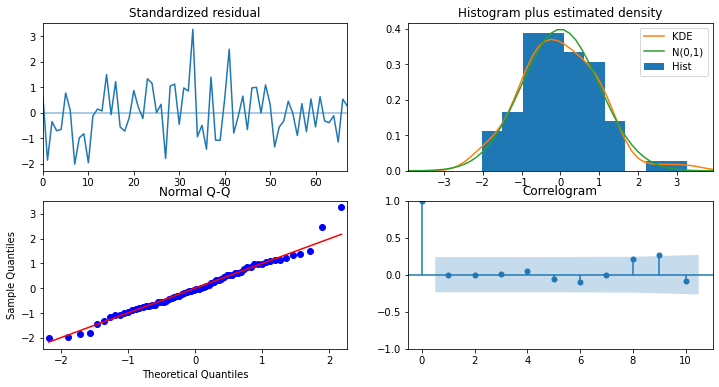

In [230]:
plt.figure(figsize=(10,8))
results_manual_SARIMA_12.plot_diagnostics(figsize=(12,6))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [231]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [232]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,41.448189,13.962432,14.082325,68.814053
1,69.493041,13.963442,42.125198,96.860884
2,58.321603,13.963254,30.954128,85.689079
3,58.040281,14.298739,30.015267,86.065295
4,57.944927,14.297200,29.922931,85.966924


In [233]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16.010038658123573


In [234]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796244
"Alpha=0.157,Beta=0.157:DES",70.572452
"Alpha=0.0192,Beta=0.0121:DES",17.223483
"Alpha=0.133,Beta=0.0137,Gamma=0.0:DES",16.443203
"Alpha=2.904,Beta=1.879,Gamma=0.214:TES",25.146807
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


In [235]:
print('In Rose the sorted order of Test RMSE values:')
resultsDf.sort_values(by=['Test RMSE'])

In Rose the sorted order of Test RMSE values:


,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3:TES",10.945435
2pointTrailingMovingAverage,11.529278
"Alpha=0.070,Beta=9.880,Gamma=0.0:TES",12.795796
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
RegressionOnTime,15.268955
"ARIMA(3,1,2)",15.522264
"SARIMA(3,1,2)(3,1,2,6)",15.522264
"ARIMA(0,1,2)",15.618896


## Building the most optimum model on the Full Data.

In [236]:
# Initializing the Double Exponential Smoothing Model
model_TES3 = ExponentialSmoothing(df_1,trend='add',seasonal='mul')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [237]:
# Fitting the model
model_TES3 = model_TES3.fit(smoothing_level=0.3,
    smoothing_slope=0.4,
    smoothing_seasonal=0.3,optimized=True)

In [238]:
model_TES3.params

{'smoothing_level': 0.3,
 'smoothing_slope': 0.4,
 'smoothing_seasonal': 0.3,
 'damping_slope': nan,
 'initial_level': 64.0,
 'initial_slope': 0.15277777777777787,
 'initial_seasons': array([1.75    , 1.84375 , 2.015625, 1.546875, 1.8125  , 2.625   ,
        1.84375 , 2.015625, 3.203125, 2.296875, 2.34375 , 4.171875]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [239]:
# Forecasting using this model for the duration of the test set
TES_predict3 =  model_TES3.forecast(steps=12)
TES_predict3

1995-08-31    40.074648
1995-09-30    39.245730
1995-10-31    41.312369
1995-11-30    48.067469
1995-12-31    68.735454
1996-01-31    25.994292
1996-02-29    33.337602
1996-03-31    39.734801
1996-04-30    42.746984
1996-05-31    33.573536
1996-06-30    40.505265
1996-07-31    42.410526
Freq: M, dtype: float64

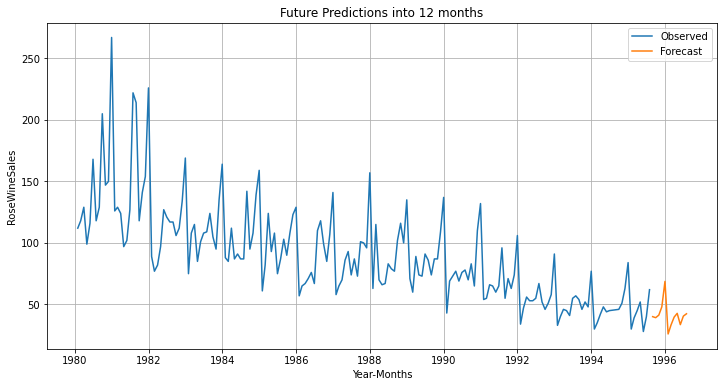

In [240]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))
#plt.plot(train, label='Train')
#plt.plot(test, label='Test')
plt.plot(df_1['Rose'], label='Observed')
plt.plot(TES_predict3, label='Forecast')
plt.legend(loc='best')
plt.xlabel('Year-Months')
plt.ylabel('RoseWineSales')
plt.grid()
plt.title('Future Predictions into 12 months');

In [247]:
import statsmodels.api as sm

full_data_model = sm.tsa.statespace.SARIMAX(df_1['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -652.643
Date:                           Wed, 24 Feb 2021   AIC                           1327.287
Time:                                   17:07:15   BIC                           1361.045
Sample:                                        0   HQIC                          1340.996
                                           - 187                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4708      0.250      1.885      0.059      -0.019       0.960
ar.L2         -0.1693      0.097     -1.754

In [248]:
predicted_results_full_data_model = results_full_data_model.get_forecast(steps=12)

In [249]:
predicted_results_full_data_model.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,51.259656,14.546412,22.749212,79.770101
1,47.308842,14.937631,18.031623,76.586060
2,47.606751,15.017397,18.173194,77.040308
3,56.063600,15.019051,26.626800,85.500400
4,77.987317,15.083485,48.424229,107.550405


In [250]:
rmse = mean_squared_error(df_1['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.97945231820886


In [253]:
pred_full_date = predicted_results_full_data_model.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

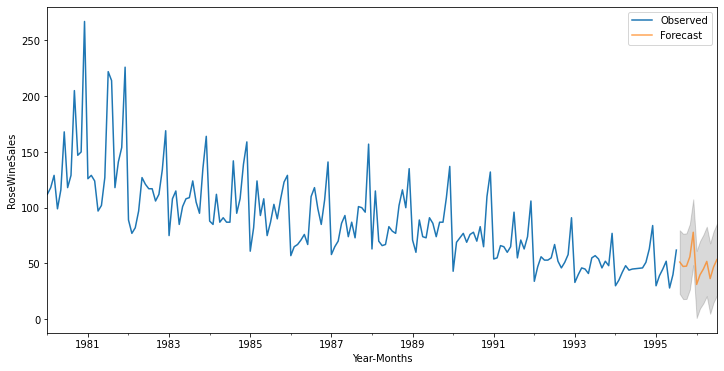

In [255]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,6))
axis = df_1['Rose'].plot(label='Observed')
pred_full_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_date.index, pred_full_date['mean_ci_lower'], 
                  pred_full_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseWineSales')
plt.legend(loc='best')
plt.show()